In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Show basic info
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
# Step 2: Basic Info & Missing Values Check

print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing values in each column:\n", df.isnull().sum())

Shape of dataset: (1470, 35)

Data Types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionL

In [13]:
# View categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:\n", categorical_cols.tolist())

Categorical Columns:
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [14]:
# Unique values in categorical columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


In [16]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary columns
label_cols = ['Attrition', 'Gender', 'OverTime']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Drop 'Over18' as it has only one value
df.drop('Over18', axis=1, inplace=True)

# One-Hot Encoding for other categoricals
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)

# Confirm new shape
print("New shape after encoding:", df.shape)

New shape after encoding: (1470, 48)


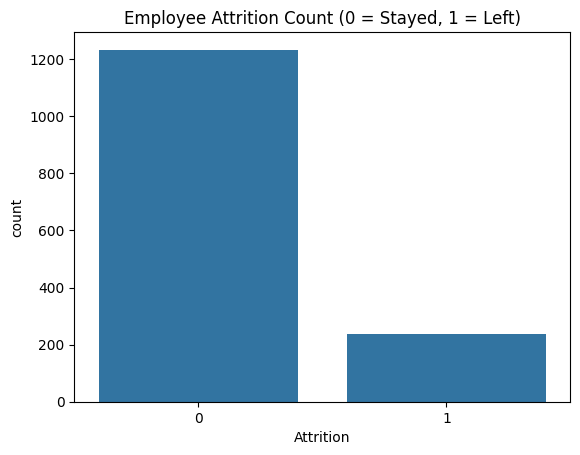

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Count of employees who left vs stayed
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count (0 = Stayed, 1 = Left)")
plt.show()

In [19]:
# Correlation with target
correlation = df.corr(numeric_only=True)
attrition_corr = correlation['Attrition'].sort_values(ascending=False)
print("Top correlations with Attrition:\n", attrition_corr.head(10))
print("\nLowest correlations:\n", attrition_corr.tail(5))

Top correlations with Attrition:
 Attrition                           1.000000
OverTime                            0.246118
MaritalStatus_Single                0.175419
JobRole_Sales Representative        0.157234
BusinessTravel_Travel_Frequently    0.115143
JobRole_Laboratory Technician       0.098290
Department_Sales                    0.080855
DistanceFromHome                    0.077924
EducationField_Technical Degree     0.069355
EducationField_Marketing            0.055781
Name: Attrition, dtype: float64

Lowest correlations:
 YearsInCurrentRole   -0.160545
JobLevel             -0.169105
TotalWorkingYears    -0.171063
EmployeeCount              NaN
StandardHours              NaN
Name: Attrition, dtype: float64


In [20]:
# Drop constant/uninformative columns
df.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

In [21]:
print("Shape after dropping useless columns:", df.shape)

Shape after dropping useless columns: (1470, 45)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# 2. Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm shape
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)

X_train shape: (1176, 44)
X_test shape: (294, 44)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8605442176870748

Confusion Matrix:
 [[237  10]
 [ 31  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)

print("Accuracy (RF):", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix (RF):\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (RF):\n", classification_report(y_test, y_pred_rf))

Accuracy (RF): 0.8333333333333334

Confusion Matrix (RF):
 [[241   6]
 [ 43   4]]

Classification Report (RF):
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.40      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.62      0.53      0.52       294
weighted avg       0.78      0.83      0.79       294



In [25]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check new shape
print("Before SMOTE:", X_train_scaled.shape, y_train.value_counts())
print("After SMOTE:", X_train_resampled.shape)

ModuleNotFoundError: No module named 'imblearn'

In [26]:
%pip install imbalanced-learn

   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ----- --------------------------------- 30.7/238.4 kB 660.6 kB/s eta 0:00:01
   ---------------------------------- ----- 204.8/238.4 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", X_train_scaled.shape, y_train.value_counts())
print("After SMOTE:", X_train_resampled.shape)

Before SMOTE: (1176, 44) Attrition
0    986
1    190
Name: count, dtype: int64
After SMOTE: (1972, 44)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train RF on balanced data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_resampled, y_train_resampled)

# Predict on test data (which remains unchanged)
y_pred_rf_smote = rf_smote.predict(X_test_scaled)

# Evaluate
print("Accuracy (RF with SMOTE):", accuracy_score(y_test, y_pred_rf_smote))
print("Confusion Matrix (RF with SMOTE):\n", confusion_matrix(y_test, y_pred_rf_smote))
print("Classification Report (RF with SMOTE):\n", classification_report(y_test, y_pred_rf_smote))

Accuracy (RF with SMOTE): 0.8435374149659864
Confusion Matrix (RF with SMOTE):
 [[235  12]
 [ 34  13]]
Classification Report (RF with SMOTE):
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       247
           1       0.52      0.28      0.36        47

    accuracy                           0.84       294
   macro avg       0.70      0.61      0.64       294
weighted avg       0.82      0.84      0.82       294



In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create Random Forest instance
rf = RandomForestClassifier(random_state=42)

# Use recall as scoring to focus on minority class detection
recall_scorer = make_scorer(recall_score, pos_label=1)

# Randomized search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=20, scoring=recall_scorer,
                                   cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit on balanced data
random_search.fit(X_train_resampled, y_train_resampled)

print("Best params:", random_search.best_params_)
print("Best recall score:", random_search.best_score_)

# Use best model to predict test data
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

print("Accuracy (Tuned RF):", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix (Tuned RF):\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report (Tuned RF):\n", classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Best recall score: 0.907798329503052
Accuracy (Tuned RF): 0.8469387755102041
Confusion Matrix (Tuned RF):
 [[239   8]
 [ 37  10]]
Classification Report (Tuned RF):
               precision    recall  f1-score   support

           0       0.87      0.97      0.91       247
           1       0.56      0.21      0.31        47

    accuracy                           0.85       294
   macro avg       0.71      0.59      0.61       294
weighted avg       0.82      0.85      0.82       294



In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train logistic regression on SMOTE data
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on test data with default threshold 0.5
y_pred = logreg.predict(X_test_scaled)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred))
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred))
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred))

Accuracy (Logistic Regression): 0.7755102040816326
Confusion Matrix (Logistic Regression):
[[200  47]
 [ 19  28]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       247
           1       0.37      0.60      0.46        47

    accuracy                           0.78       294
   macro avg       0.64      0.70      0.66       294
weighted avg       0.83      0.78      0.79       294



In [32]:
import numpy as np
from sklearn.metrics import classification_report

# Predict probabilities using the scaled test set
y_probs = logreg.predict_proba(X_test_scaled)[:, 1]

# Try thresholds from 0.1 to 0.9
for thresh in np.arange(0.1, 1.0, 0.1):
    y_pred_thresh = (y_probs >= thresh).astype(int)
    print(f"Threshold: {thresh:.1f}")
    print(classification_report(y_test, y_pred_thresh))
    print('-' * 40)

Threshold: 0.1
              precision    recall  f1-score   support

           0       0.95      0.39      0.55       247
           1       0.22      0.89      0.35        47

    accuracy                           0.47       294
   macro avg       0.58      0.64      0.45       294
weighted avg       0.83      0.47      0.52       294

----------------------------------------
Threshold: 0.2
              precision    recall  f1-score   support

           0       0.94      0.52      0.67       247
           1       0.25      0.83      0.38        47

    accuracy                           0.57       294
   macro avg       0.60      0.68      0.53       294
weighted avg       0.83      0.57      0.63       294

----------------------------------------
Threshold: 0.3
              precision    recall  f1-score   support

           0       0.94      0.66      0.77       247
           1       0.30      0.77      0.43        47

    accuracy                           0.68       294
 

In [33]:
final_thresh = 0.4
y_final_pred = (y_probs >= final_thresh).astype(int)

print("Final Model Evaluation (Threshold = 0.4):")
print(confusion_matrix(y_test, y_final_pred))
print(classification_report(y_test, y_final_pred))

Final Model Evaluation (Threshold = 0.4):
[[180  67]
 [ 13  34]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       247
           1       0.34      0.72      0.46        47

    accuracy                           0.73       294
   macro avg       0.63      0.73      0.64       294
weighted avg       0.84      0.73      0.76       294



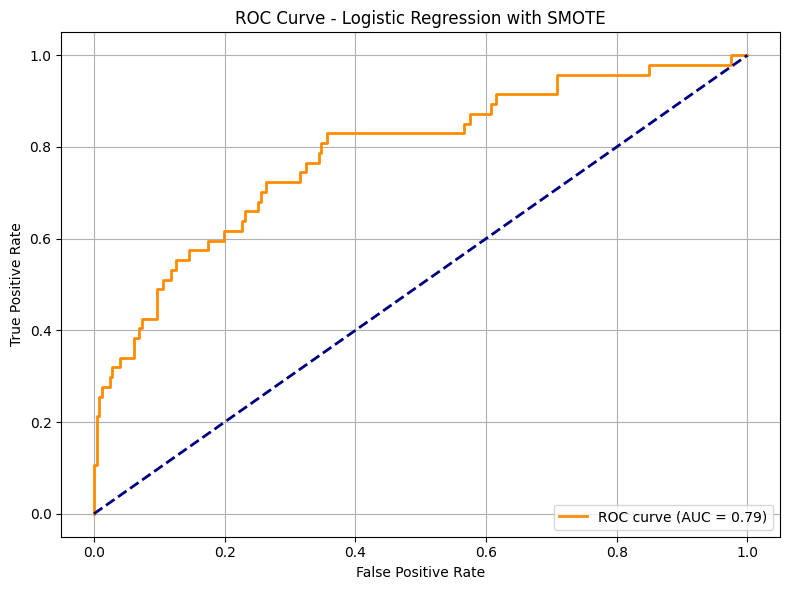

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression with SMOTE')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
import joblib

# Save the trained logistic regression model
joblib.dump(logreg, 'logistic_regression_attrition_model.pkl')
# Save the scaler too
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']